<a href="https://colab.research.google.com/github/acrumz/DSCI-235-Final-Project/blob/main/DSCI_235_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question 1: Does Spending more money lead to success in the future? (Ari)

Research Question 2: How does spending impact playoff success across leagues?

Research Question 3: How Do leagues with a Salary Cap (NBA,NFL,NHL) compare to leagues without a salary cap? (MLB)

In [ ]:
import pandas as pd
import numpy as np

# Analysis of MLB teams payroll on team success(win precentage)(Sam Rolsten)

---



I started my research by finding a data set that includes win percentage, total payroll,	year,	world series winner(y/n),	payroll rank, and	top 10 payroll(y/n) for all 30 teams.

In [ ]:
### Baseball

data = {
    "rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
             21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "team": ["Los Angeles Dodgers", "New York Yankees", "Philadelphia Phillies", "San Diego Padres", "Boston Red Sox",
             "Chicago White Sox", "Los Angeles Angels", "New York Mets", "Atlanta Braves", "Houston Astros",
             "Toronto Blue Jays", "St. Louis Cardinals", "San Francisco Giants", "Chicago Cubs", "Texas Rangers",
             "Detroit Tigers", "Colorado Rockies", "Minnesota Twins", "Milwaukee Brewers", "Washington Nationals",
             "Cincinnati Reds", "Seattle Mariners", "Kansas City Royals", "Arizona Diamondbacks", "Tampa Bay Rays",
             "Miami Marlins", "Cleveland Guardians", "Pittsburgh Pirates", "Oakland Athletics", "Baltimore Orioles"],
    "win_percentage": [0.676, 0.737, 0.474, 0.482, 0.421, 0.508, 0.6, 0.605, 0.447, 0.541,
                       0.526, 0.517, 0.595, 0.405, 0.459, 0.342, 0.486, 0.579, 0.429, 0.333,
                       0.297, 0.436, 0.378, 0.475, 0.605, 0.406, 0.423, 0.432, 0.4, 0.385],
    "total_payroll": [2.8282054e8, 2.4610802e8, 2.328621e8, 2.193988e8, 2.083818e8,
                      1.945589e8, 1.9115942e8, 1.8705813e8, 1.7990457e8, 1.7415069e8,
                      1.6767653e8, 1.5740178e8, 1.5333293e8, 1.4760786e8, 1.4480651e8,
                      1.3748463e8, 1.361448e8, 1.3182458e8, 1.3032748e8, 1.3016915e8,
                      1.1648643e8, 1.0567732e8, 97085136, 88653158, 85996529,
                      80033833, 67678868, 7277606, 48143806, 45779162],
    "year": [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
             None, None, None, None, None, None, None, None, None, None,
             None, None, None, None, None, None, None, None, None, None],
    "world_series_winner": ["Braves", "Dodgers", "Nationals", "Red Sox", "Astros", "Cubs", "Royals", "Giants", "Red Sox", "Giants",
                            None, None, None, None, None, None, None, None, None, None,
                            None, None, None, None, None, None, None, None, None, None],
    "payroll_rank": [11, 2, 4, 1, 6, 6, 17, 7, 4, 18,
                     None, None, None, None, None, None, None, None, None, None,
                     None, None, None, None, None, None, None, None, None, None],
    "top_10_payroll?": ["no", "yes", "yes", "yes", "yes", "yes", "no", "yes", "yes", "no",
                        None, None, None, None, None, None, None, None, None, None,
                        None, None, None, None, None, None, None, None, None, None],
}

df = pd.DataFrame(data)
df.head(10)  # Display first 10 rows

,rank,team,win_percentage,total_payroll,year,world_series_winner,payroll_rank,top_10_payroll?
0,1,Los Angeles Dodgers,0.676,282820540.0,2021.0,Braves,11.0,no
1,2,New York Yankees,0.737,246108020.0,2020.0,Dodgers,2.0,yes
2,3,Philadelphia Phillies,0.474,232862100.0,2019.0,Nationals,4.0,yes
3,4,San Diego Padres,0.482,219398800.0,2018.0,Red Sox,1.0,yes
4,5,Boston Red Sox,0.421,208381800.0,2017.0,Astros,6.0,yes
5,6,Chicago White Sox,0.508,194558900.0,2016.0,Cubs,6.0,yes
6,7,Los Angeles Angels,0.600,191159420.0,2015.0,Royals,17.0,no
7,8,New York Mets,0.605,187058130.0,2014.0,Giants,7.0,yes
8,9,Atlanta Braves,0.447,179904570.0,2013.0,Red Sox,4.0,yes
9,10,Houston Astros,0.541,174150690.0,2012.0,Giants,18.0,no


I then created a scatterplot comparing win percentage to team payroll, in order to get an idea of how are data looked. Further more I looked to see if I could find our correlation value.

rank                    0
team                    0
win_percentage          0
total_payroll           0
year                   20
world_series_winner    20
payroll_rank           20
top_10_payroll?        20
dtype: int64


<ipython-input-5-5575f55f7efd>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['year'] = df['year'].fillna(method='ffill')


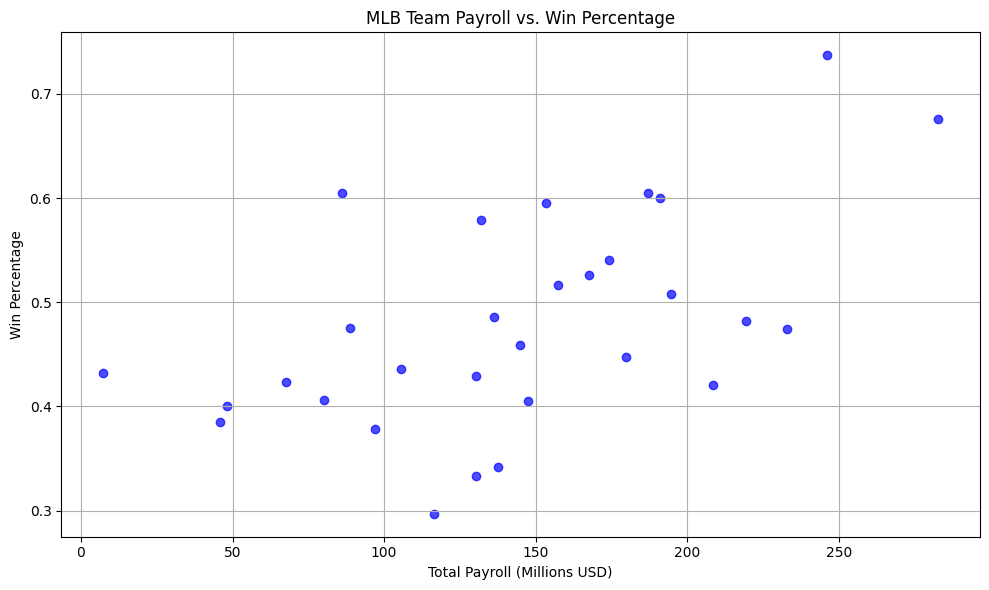

Correlation between payroll and win percentage: 0.552


In [ ]:
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Fill missing 'year' if needed
df['year'] = df['year'].fillna(method='ffill')

# Ensure payroll is numeric and scaled
df['total_payroll_mil'] = df['total_payroll'] / 1e6

plt.figure(figsize=(10, 6))
plt.scatter(df['total_payroll_mil'], df['win_percentage'], c='blue', alpha=0.7)
plt.title("MLB Team Payroll vs. Win Percentage")
plt.xlabel("Total Payroll (Millions USD)")
plt.ylabel("Win Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df[['total_payroll', 'win_percentage']].corr().iloc[0, 1]
print(f"Correlation between payroll and win percentage: {correlation:.3f}")

The scatter plot to me shows nothing of great concern however, our correlation value for win percentage and team payroll being around 55% is interesting to me, it is the 1st indicactor I found to a trend I will futher explore later, that being payroll might not effect team proformace as much as fans might think it does.

Next to further see if there was any merit to trend I created a boxplot comparing win percentage and top 10 payroll status.

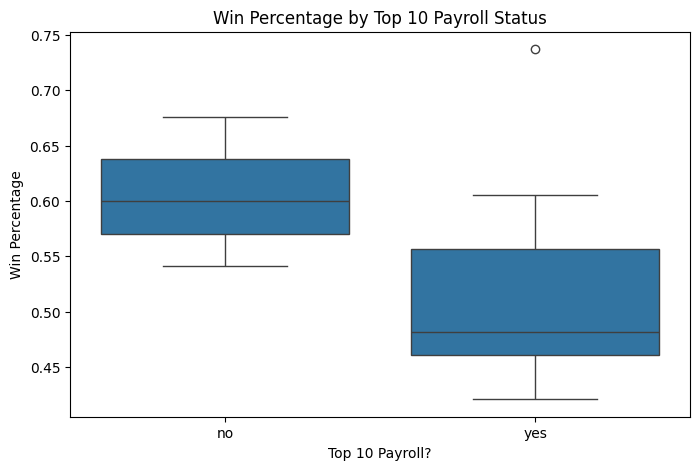

In [ ]:
import seaborn as sns

# Drop missing 'top_10_payroll?' rows
subset = df[df['top_10_payroll?'].notna()]
plt.figure(figsize=(8, 5))
sns.boxplot(x='top_10_payroll?', y='win_percentage', data=subset)
plt.title("Win Percentage by Top 10 Payroll Status")
plt.xlabel("Top 10 Payroll?")
plt.ylabel("Win Percentage")
plt.show()

This graph to me futher proves that there might not be as much importance on team payroll and team proforamce. According to this graph teams which did not finsh the season within the top 10 trended to have higher win precenatges as opposed to team who did dinsh within the top 10.

The last thing I did to veriy my belief is to take a more "analytical" approach. To do this I ran a simple linaer regression model using win percentage as our outcome variable and payroll as our predictor variable. I was looking to see if our graph had any major model violations or trends that point towards team payroll having an impact on win precentage.

Intercept: 0.351
Payroll Coefficient: 0.000000


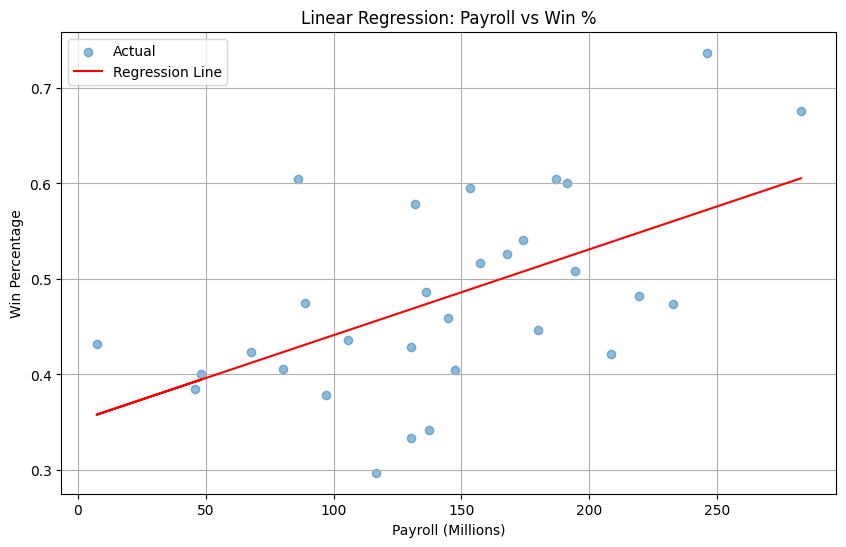

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['total_payroll']].values  # Predictor
y = df['win_percentage'].values   # Outcome

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
print(f"Intercept: {model.intercept_:.3f}")
print(f"Payroll Coefficient: {model.coef_[0]:.6f}")

# Predict and visualize
df['predicted_win_pct'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['total_payroll_mil'], df['win_percentage'], alpha=0.5, label='Actual')
plt.plot(df['total_payroll_mil'], df['predicted_win_pct'], color='red', label='Regression Line')
plt.xlabel("Payroll (Millions)")
plt.ylabel("Win Percentage")
plt.title("Linear Regression: Payroll vs Win %")
plt.legend()
plt.grid(True)
plt.show()


I didnt find any major violation in our model, all are residuals seem to be normals distributed & with no major outliers as well. This to me was the last bit of evidence I need to confidently say that I dont believe there is a major correlation between to payroll and team proformance.  

Sources used:
- https://www.statcrunch.com/reports/view?reportid=121845&tab=preview
- https://www.baseball-reference.com/
- https://www.spotrac.com/

# Analysis of NFL team preformace and team payroll(Ari)

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Merged_NFL_Payroll_with_Win_Percent.csv to Merged_NFL_Payroll_with_Win_Percent.csv


Allows the user to upload a CSV file (in this case, team payroll and win percentage data)

In [ ]:
merged_df = pd.read_csv("Merged_NFL_Payroll_with_Win_Percent.csv")


Reads the uploaded CSV file into a Pandas DataFrame named merged_df for data analysis.

In [ ]:
import plotly.express as px
plot_data = merged_df.copy()
plot_data["Payroll (Millions)"] = plot_data["Payroll"] / 1_000_000
plot_data["Win Percentage (%)"] = plot_data["W-L%"] * 100
plot_data = plot_data.dropna(subset=["Payroll (Millions)", "Win Percentage (%)"])

This code prepares the dataset for visualization by first making a copy of the merged NFL payroll and performance data. It then converts the team payroll values into millions of dollars and transforms the win-loss ratio into a whole-number percentage. Finally, it removes any rows with missing payroll or win percentage data to ensure clean, accurate plotting.

In [ ]:
fig = px.scatter(
    plot_data,
    x="Payroll (Millions)",
    y="Win Percentage (%)",
    hover_data={
        "Year": True,
        "Team": True,
        "Payroll (Millions)": ':.2f',
        "Win Percentage (%)": ':.1f'
    },
    trendline="ols",
    color_discrete_sequence=["blue"],  # one color for all
    title="NFL Payroll vs. Win Percentage (2011–2024)",
    labels={
        "Payroll (Millions)": "Payroll (Millions USD)",
        "Win Percentage (%)": "Win-Loss Percentage"
    }
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()

 Creates an interactive scatter plot where the x-axis is payroll and the y-axis is win percentage. Each point includes hover details (year, team, payroll, win %) and a regression line is added to show overall trend.

The graph shows a positive correlation between team payroll and regular season win percentage, meaning teams that spend more money tend to perform better. However, the wide spread of data points around the regression line suggests that the correlation is weak—payroll alone doesn't strongly predict success. This indicates that while spending more can help, other factors like coaching, player development, and injuries also play a major role in a team’s performance.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NFL_Payroll_Playoff.csv to NFL_Payroll_Playoff.csv


In [ ]:
# Prepare data
payroll_playoff_merged = pd.read_csv("NFL_Payroll_Playoff.csv")
plot_data = payroll_playoff_merged.copy()
plot_data["Payroll (Millions)"] = plot_data["Payroll"] / 1_000_000

# Fit linear regression
X = sm.add_constant(plot_data["Payroll (Millions)"])
y = plot_data["Playoff Score"]
model = sm.OLS(y, X).fit()
plot_data["Trendline"] = model.predict(X)

This code loads the corrected NFL playoff dataset, converts payroll to millions, and fits a linear regression model to explore the relationship between payroll and playoff performance. The predicted trendline values are added for plotting.

In [ ]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Build the plot
fig = go.Figure()

# Add team dots
fig.add_trace(go.Scatter(
    x=plot_data["Payroll (Millions)"],
    y=plot_data["Playoff Score"],
    mode='markers',
    marker=dict(size=8, opacity=0.7, color='blue'),
    text=plot_data["Team"] + " (" + plot_data["Year"].astype(str) + ")",
    hoverinfo="text",
    name="Team-Year"
))

# Add regression line
fig.add_trace(go.Scatter(
    x=plot_data["Payroll (Millions)"],
    y=plot_data["Trendline"],
    mode="lines",
    line=dict(color="red", width=2),
    name="Linear Regression"
))
# Add custom legend box
fig.add_annotation(
    xref="paper", yref="paper",
    x=1.02, y=1,
    showarrow=False,
    align="left",
    bordercolor="black",
    borderwidth=1,
    bgcolor="white",
    font=dict(size=12),
    text=(
        "<b>Scoring Legend:</b><br>"
        "5 = Won Super Bowl<br>"
        "4 = Lost Super Bowl<br>"
        "3 = Lost in Conf. Champ<br>"
        "2 = Lost in Divisional<br>"
        "1 = Lost in Wild Card<br>"
        "0 = Missed Playoffs"
    )
)

fig.update_layout(
    title="NFL Payroll vs. Playoff Success (2011–2024)",
    xaxis_title="Payroll (Millions USD)",
    yaxis_title="Playoff Performance Score",
    margin=dict(r=200)  # add space for side legend
)

fig.show()


This code builds an interactive scatter plot using Plotly to show the relationship between NFL team payroll and playoff performance. Each dot represents a team-year, with team and year info shown on hover. A red regression line illustrates the overall trend, and a custom legend box explains the playoff scoring system used in the analysis.

Sources:https://stathead.com/, https://www.spotrac.com/

# Analysis of NHL team preformance and team payroll(Ryan Lang)

---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NFL_Payroll_Playoff_Fully_Updated.csv to NFL_Payroll_Playoff_Fully_Updated.csv


In [ ]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

# Load the data
df = pd.read_csv('/mnt/data/HockeySalaryData.csv')

# Clean 'Active Payroll' and convert to millions
df['Active Payroll'] = df['Active Payroll'].replace('[\$,]', '', regex=True).astype(float) / 1_000_000

# Ensure 'Win Rate' is numeric
df['Win Rate'] = pd.to_numeric(df['Win Rate'], errors='coerce')

# Drop rows with missing data
df = df.dropna(subset=['Active Payroll', 'Win Rate', 'Season'])

# Linear regression
X = sm.add_constant(df['Active Payroll'])
model = sm.OLS(df['Win Rate'], X).fit()
df['Regression Line'] = model.predict(X)

# Interactive scatter plot
fig = px.scatter(
    df,
    x='Active Payroll',
    y='Win Rate',
    text='Team',
    color='Season',
    co
    hover_data=['Team', 'Season', 'Active Payroll', 'Win Rate'],
    title='Active Payroll vs Win Rate by Season',
    labels={'Active Payroll': 'Active Payroll (in Millions)', 'Win Rate': 'Win Rate'}
)

# Add regression line
fig.add_scatter(x=df['Active Payroll'], y=df['Regression Line'],
                mode='lines', name='Regression Line')

# Layout tweaks
fig.update_traces(textposition='top center')
fig.update_layout(
    hovermode='closest',
    xaxis=dict(tickformat=".1f", title='Active Payroll (in Millions)'),
    yaxis=dict(range=[0, 1], tickformat=".0%"),
    margin=dict(t=50, l=50, b=50),
    height=600
)

fig.show()


Sources Used: https://hoopshype.com/, https://stathead.com/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NBA_Performance_Payroll_Data_.csv to NBA_Performance_Payroll_Data_.csv


In [ ]:
df = pd.read_csv("NBA_Performance_Payroll_Data_.csv")
df.head()

df['Payroll_M'] = df['Inflation_Adjusted_2025'] / 1e6
df = df[df['Payroll_M'].notna()]

df['Spending_Level'] = pd.qcut(df['Payroll_M'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
# Add a hover-friendly label
df['Label'] = df['Team'] + " (" + df['Season'] + ")"

# Derived columns
df['Payroll_M'] = df['Inflation_Adjusted_2025'] / 1e6
df['Win_Percent_Label'] = df['Win_Percentage'] * 100
df['Year'] = pd.to_datetime(df['Season'].str[:4]).dt.year
df['Label'] = df['Team'] + " (" + df['Season'] + ")"

In [ ]:
import plotly.express as px
# Plot with regression line
fig = px.scatter(
    df,
    x="Payroll_M",
    y="Win_Percent_Label",
    color="Year",
    color_continuous_scale="viridis",
    hover_name="Label",
    hover_data={
        "Payroll_M": True,
        "Win_Percent_Label": True,
        "Year": False,
        "Label": False
    },
    labels={
        "Payroll_M": "Payroll (Millions)",
        "Win_Percent_Label": "Win Percentage (%)"
    },
    title="NBA Team Payroll vs Win Percentage (Regular Season)",
    trendline="ols"  # Add linear regression
)

# Format and display
fig.update_traces(marker=dict(size=9, line=dict(width=0.5, color='black')))
fig.update_layout(coloraxis_colorbar=dict(title="Season Start Year"))
fig.update_yaxes(ticksuffix="%")
fig.show()

The Data shows that:
Spending more money is slightly associated with better win percentage.

BUT: there are many teams with average or low payrolls that win a lot, and many high-spending teams that don’t.

It shows that money helps, but it’s not the only factor in winning.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Playoff_Success_Cleaned_2000_2024.csv to Playoff_Success_Cleaned_2000_2024 (1).csv


In [ ]:
# Replace the filename with what you uploaded
df = pd.read_csv("Playoff_Success_Cleaned_2000_2024.csv")

# Rename to keep consistent with earlier code
merged_df = df


This cell reads in a CSV file that contains team payroll and playoff success data between 2000 and 2024. It uses pandas.read_csv() to load the data into a DataFrame named df. Immediately afterward, the variable is reassigned to merged_df.

In [ ]:
# label and payroll in millions
merged_df['Payroll_M'] = merged_df['Inflation_Adjusted_2025'] / 1e6
merged_df['Label'] = merged_df['Team'] + " (" + merged_df['Season'] + ")"


This cell creates two new columns in the DataFrame to prepare for plotting:


*   Payroll_M: Converts inflation-adjusted payroll from dollars to millions by dividing by 1,000,000. This makes axis labels and values more readable on the graph.
*   Label: Generates a custom label combining the team name and season year, formatted like "Denver (2005-06)". This label will be used for hover tooltips in the visualization to help identify each data point clearly.



In [ ]:
# Build the base plot
fig = px.scatter(
    merged_df,
    x='Payroll_M',
    y='Playoff_Score',
    hover_name='Label',
    trendline='ols',
    labels={
        'Payroll_M': 'Payroll (Millions)',
        'Playoff_Score': 'Playoff Success Score'
    },
    title='Payroll vs Playoff Success (with Score Legend)'
)

This box uses plotly.express.scatter() to create a scatter plot:


*   X-axis: Team payroll (in millions).

*   Y-axis: A playoff success score (ranging from 0 to 5, where 5 means the team won the championship and 0 means they missed the playoffs).
*   Show team and season info using the label column.


*   Adds a linear regression (ols) to show if there's a correlation between spending and success.



In [ ]:
import plotly.express as px

# Add custom annotation as legend text
fig.add_annotation(
    xref='paper', yref='paper',
    x=1.05, y=0.5,
    showarrow=False,
    align='left',
    text=(
        "<b>Playoff Score Legend:</b><br>"
        "0: Missed Playoffs<br>"
        "1: 1st Round Exit (1–3 Wins (2 wins pre 2003))<br>"
        "2: 2nd Round Exit (4–7 Wins)<br>"
        "3: Conf Finals (8–11 Wins)<br>"
        "4: Finals Loss (12–15 Wins)<br>"
        "5: Champions (16 or 15 pre-2003)"
    ),
    font=dict(size=12),
    bordercolor="black",
    borderwidth=1,
    bgcolor="white",
    opacity=0.9
)

# Style
fig.update_traces(marker=dict(size=9, line=dict(width=0.5, color='black')))
fig.update_layout(showlegend=False, margin=dict(r=150))  # make space on right

fig.show()





This part manually adds a custom playoff score legend to the plot and styles the appearance:

*  add_annotation: Adds a text box to the plot that explains what each playoff score (0–5) means.

*   add_annotation: Adds a text box to the plot that explains what each playoff score (0–5) means.
*  update_layout: Disables the default legend (showlegend=False) and adjusts the right margin (r=150) to make room for my custom legend


*  fig.show(): displays the interactive plot.



# Group findings/conclusion:

---



In conclusion, In order to find How does spending impact playoff success across leagues along with how leagues with a Salary Cap compare to leagues without a salary cap. All our evidence indicates that there is no real differnce between the impact salary caps have leagues. After looking through all of our results we came out believing that when looking at leagues such as The NFL & NHL & NBA which have salary caps present we see slight correlation between team payroll and team success. looking at the NFL & NBA we see that a lot of the data points are scattered making the coorilations between payroll and success weak meaning there is other things that contribute to these teams doing well or poor.  However when looking at the MLB an league which doesnt have a salary cap we see even less correlation. When looking at the plots made, such as a boxplot we see more eviednce pointing towards there being to impact on team payroll and success.

